In [1]:
import os
import string
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf

data_dir = Path('../data')

income_groups_1637 = pd.read_csv(data_dir / 'interim' / 'income_groups_1637.csv', index_col='district')
income_1880 = pd.read_csv(data_dir / 'interim' / 'income_tax_record_1880.csv', index_col=0)
income_1880['total_tax'] = income_1880.sum(axis=1)

/tmp/ipykernel_44221/537570600.py:14: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [2]:
totals = income_groups_1637.sum(axis=0)
percentiles = (totals / totals.sum()).round(2)
cum_percentiles = percentiles.cumsum()
cum_percentiles

12_ore    0.67
16_ore    1.00
dtype: float64

In [3]:
breaks = income_1880.total_tax.quantile(cum_percentiles)
breaks

0.67      2.0
1.00    562.0
Name: total_tax, dtype: float64

In [4]:
classes = pd.cut(
    income_1880.total_tax,
    bins=[0] + list(breaks),
    labels=[1, 2],
)
income_1880['class'] = classes
income_1880.loc[0:518, 'district'] = 'Vanha_kaupunki'
income_1880.loc[675:708, 'district'] = 'Vallin_laajennus'
income_1880.head()

,district,plot_number,estate_income,business_income,salary_pension_income,total_tax,class
0,Vanha_kaupunki,1,0.0,0.0,3.0,3.0,2
1,Vanha_kaupunki,2,15.0,0.0,25.0,40.0,2
2,Vanha_kaupunki,2,0.0,0.0,1.0,1.0,1
3,Vanha_kaupunki,2,0.0,0.0,1.0,1.0,1
4,Vanha_kaupunki,2,0.0,0.0,40.0,40.0,2


In [5]:
cross = income_1880[["district", "class", "plot_number"]].groupby(["district", "class"]).count()
cross.rename(columns={'plot_number': 'count'}, inplace=True)
cross.to_csv(data_dir / 'processed' / 'classes_by_district_1880.csv')

In [6]:
import cufflinks as cf

old_suburbs = 'Pietarin_esikaupunki Viipurin_esikaupunki P_Annan_kruunu'.split()
new_districts = 'Salakkalahti Repola Anina Pantsarlahti Papula Vallin_laajennus Saunalahti'.split()
outside_town = 'Sorvalinsaari Talikkala Monrepos Havi Huusniemi Likolampi Hiekka Paulovski Pikiruukki'.split()

# grouper = {d: 'old_town' for d in old_town} | {d: 'old_suburbs' for d in old_suburbs} |\
#           {d: 'new_districts' for d in new_districts} | {d: 'outside_town' for d in outside_town}

grouper = {'Vanha_kaupunki': 'old_town', 'Valli': 'Valli'} | {d: 'old_suburbs' for d in old_suburbs} |\
          {d: 'new_districts' for d in new_districts} | {d: 'outside_town' for d in outside_town}

In [7]:

cross = cross.reset_index()
cross = cross.pivot(index='district', columns='class', values='count')
# cross = cross[['2', '1']]
cross.sum(axis=1)
cross

class,1,2
district,,
Anina,175,12
Havi,25,3
Hiekka,65,21
Huusniemi,1,0
Likolampi,32,4
Monrepos,5,0
P_Annan_kruunu,17,11
Pantsarlahti,379,34
Papula,43,22


In [8]:
income_groups_1637_pct = income_groups_1637.copy()
income_groups_1637_pct['12_ore'] = income_groups_1637['12_ore'] / income_groups_1637.sum(axis=1)
income_groups_1637_pct['16_ore'] = income_groups_1637['16_ore'] / income_groups_1637.sum(axis=1)
income_groups_1637_pct = income_groups_1637_pct.sort_values(by='12_ore')
income_groups_1637_pct

,12_ore,16_ore
district,,
Kaupunki,0.260504,0.739496
Valli,0.838323,0.161677
Siikaniemi,0.902655,0.097345
Pantsarlahti,0.911111,0.088889
tenant_farmers,1.000000,0.000000


In [9]:
cross_pct = cross.copy()
cross_pct[2] = cross[2] / cross.sum(axis=1)
cross_pct[1] = cross[1] / cross.sum(axis=1)
cross_pct

class,1,2
district,,
Anina,0.935829,0.064171
Havi,0.892857,0.107143
Hiekka,0.755814,0.244186
Huusniemi,1.000000,0.000000
Likolampi,0.888889,0.111111
Monrepos,1.000000,0.000000
P_Annan_kruunu,0.607143,0.392857
Pantsarlahti,0.917676,0.082324
Papula,0.661538,0.338462


<AxesSubplot:ylabel='district'>

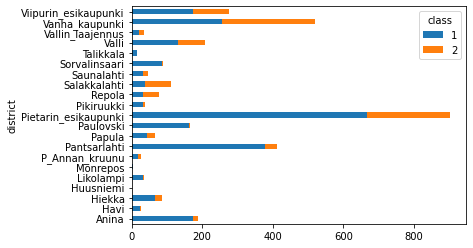

In [10]:
cross.plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

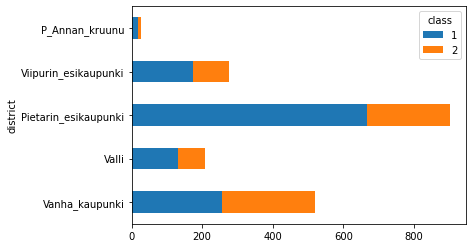

In [11]:
cross.loc['Vanha_kaupunki Valli'.split() + old_suburbs].plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

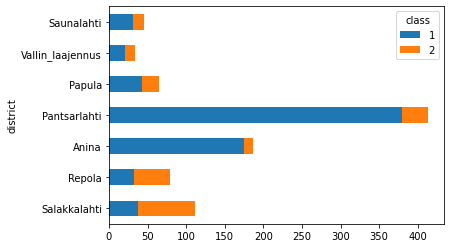

In [12]:
cross.loc[new_districts].plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

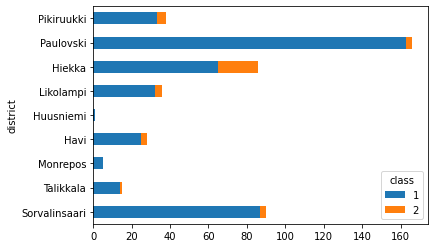

In [13]:
cross.loc[outside_town].plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

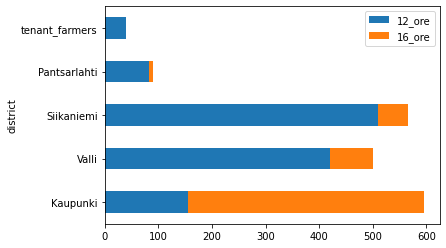

In [14]:
income_groups_1637.plot(kind='barh', stacked=True)

In [15]:
cross_grouped = cross.groupby(
    by=grouper,
).sum()
cross_grouped

class,1,2
district,,
Valli,133,74
new_districts,719,217
old_suburbs,860,348
old_town,257,262
outside_town,425,40


<AxesSubplot:ylabel='district'>

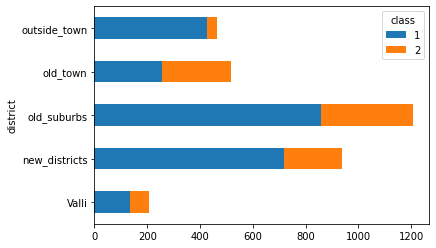

In [16]:
cross_grouped.plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

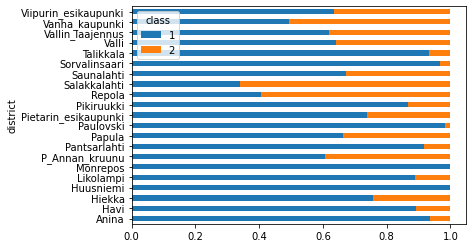

In [17]:
cross_pct.plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

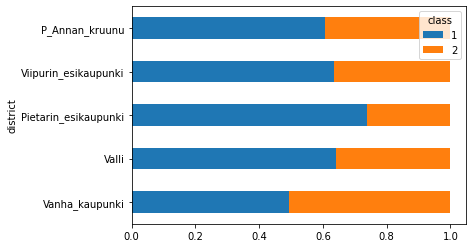

In [18]:
cross_pct.loc['Vanha_kaupunki Valli'.split() + old_suburbs].plot(kind='barh', stacked=True)

In [19]:
cross_grouped_pct = cross_grouped.copy()
cross_grouped_pct[2] = cross_grouped[2] / cross_grouped.sum(axis=1)
cross_grouped_pct[1] = cross_grouped[1] / cross_grouped.sum(axis=1)
cross_grouped_pct = cross_grouped_pct.sort_values(by=1)
cross_grouped_pct

class,1,2
district,,
old_town,0.495183,0.504817
Valli,0.642512,0.357488
old_suburbs,0.711921,0.288079
new_districts,0.768162,0.231838
outside_town,0.913978,0.086022


<AxesSubplot:ylabel='district'>

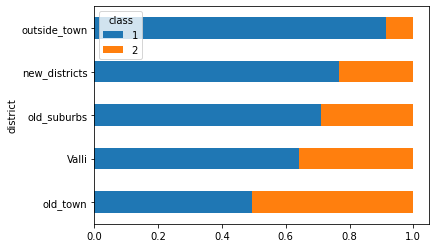

In [20]:
cross_grouped_pct.plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

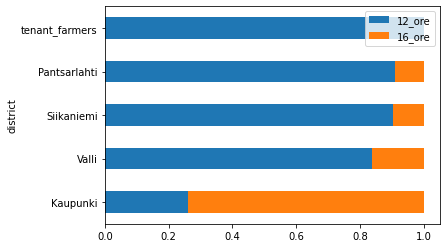

In [21]:
income_groups_1637_pct.plot(kind='barh', stacked=True)

<AxesSubplot:xlabel='year', ylabel='stone_buildings'>

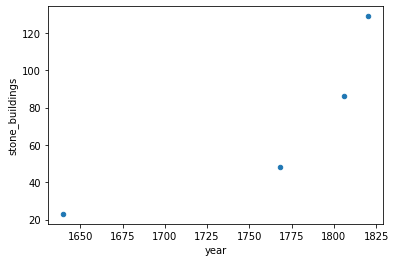

In [25]:
year = [1640, 1768, 1806, 1820, 1850, 1870, 1930]
stone = [23, 48, 86, 129, 120, 181, 255]
buildings = pd.DataFrame(dict(year=year, stone_buildings=stone))#.set_index('year')
buildings.plot(kind='scatter', x='year', y='stone_buildings')